In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


In [3]:

df = pd.read_csv('online_retail.csv')


In [4]:
df.shape

(541909, 9)

In [5]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Remove cancelled invoices (start with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove negative or zero quantity and price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [11]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


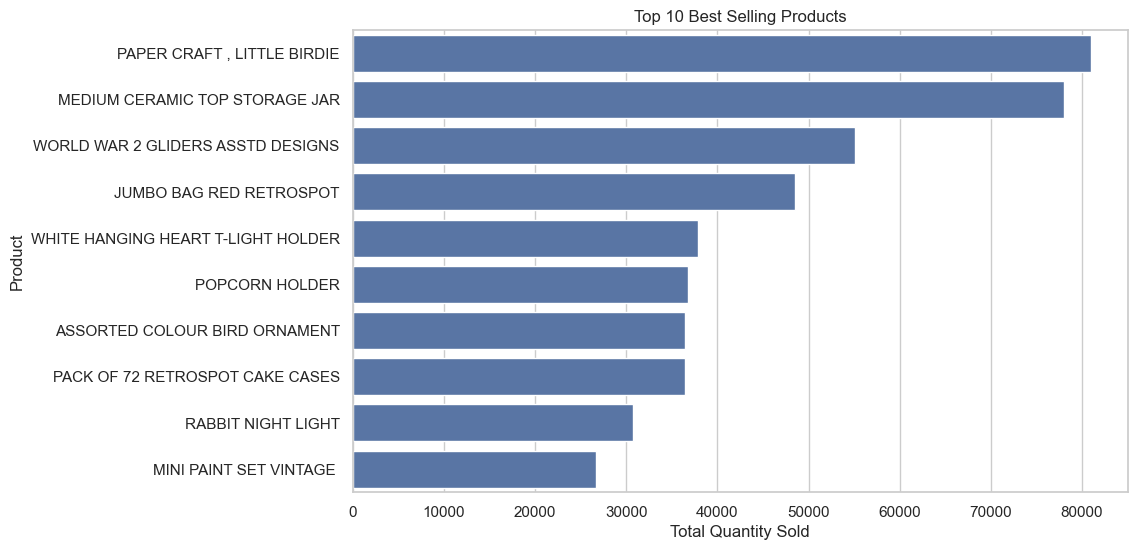

In [12]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.show()


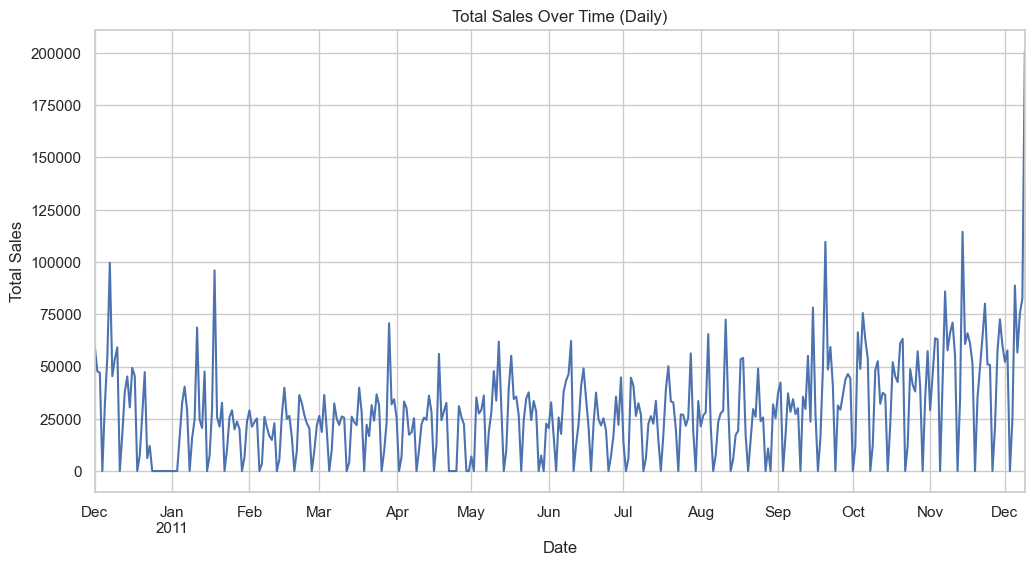

In [13]:
sales_by_date = df.set_index('InvoiceDate').resample('D')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
sales_by_date.plot()
plt.title("Total Sales Over Time (Daily)")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.show()


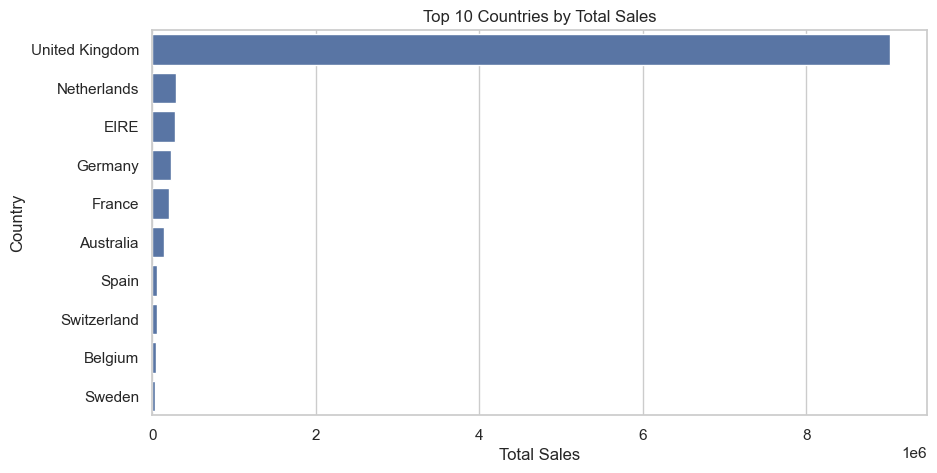

In [14]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.show()


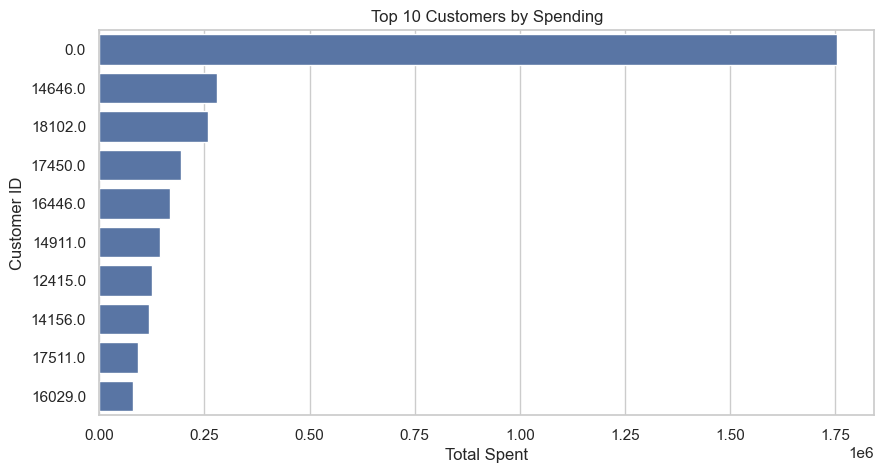

In [15]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str))
plt.title("Top 10 Customers by Spending")
plt.xlabel("Total Spent")
plt.ylabel("Customer ID")
plt.show()


In [18]:
import pandas as pd

# Load dataset
df = pd.read_csv("online_retail.csv", encoding="ISO-8859-1")

# Data Cleaning
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.dropna(subset=['CustomerID'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Add TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Assign cleaned DataFrame
df_cleaned = df


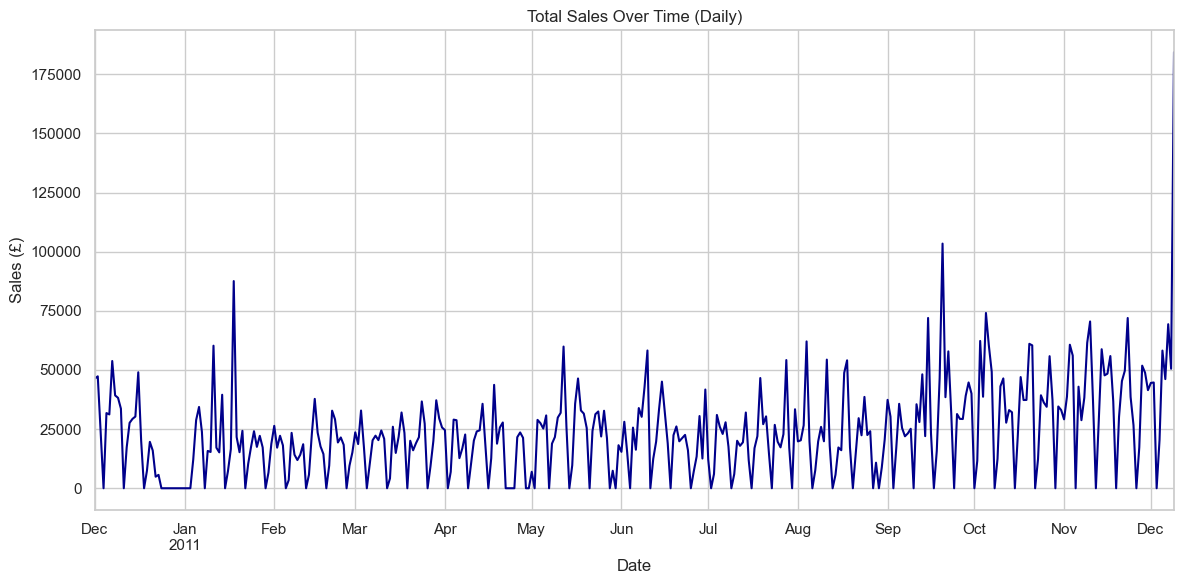

In [19]:
# Set the date as index and calculate daily total sales
daily_sales = df_cleaned.set_index('InvoiceDate').resample('D')['TotalPrice'].sum()

# Plot line chart
plt.figure(figsize=(12, 6))
daily_sales.plot(color='darkblue')
plt.title("Total Sales Over Time (Daily)")
plt.xlabel("Date")
plt.ylabel("Sales (£)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\khann\AppData\Local\Temp\ipykernel_11544\1228695054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='flare')


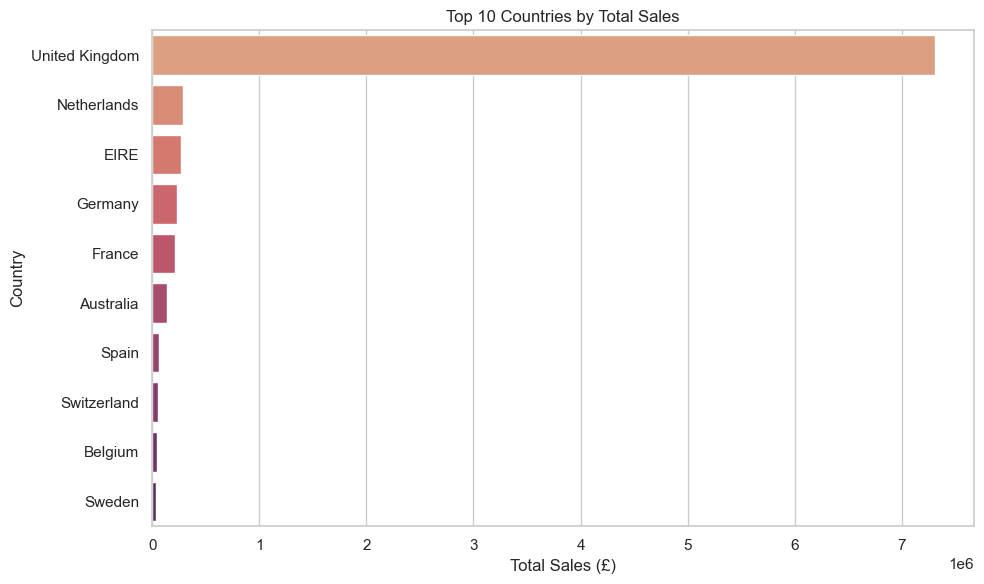

In [20]:
top_countries = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='flare')
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Total Sales (£)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


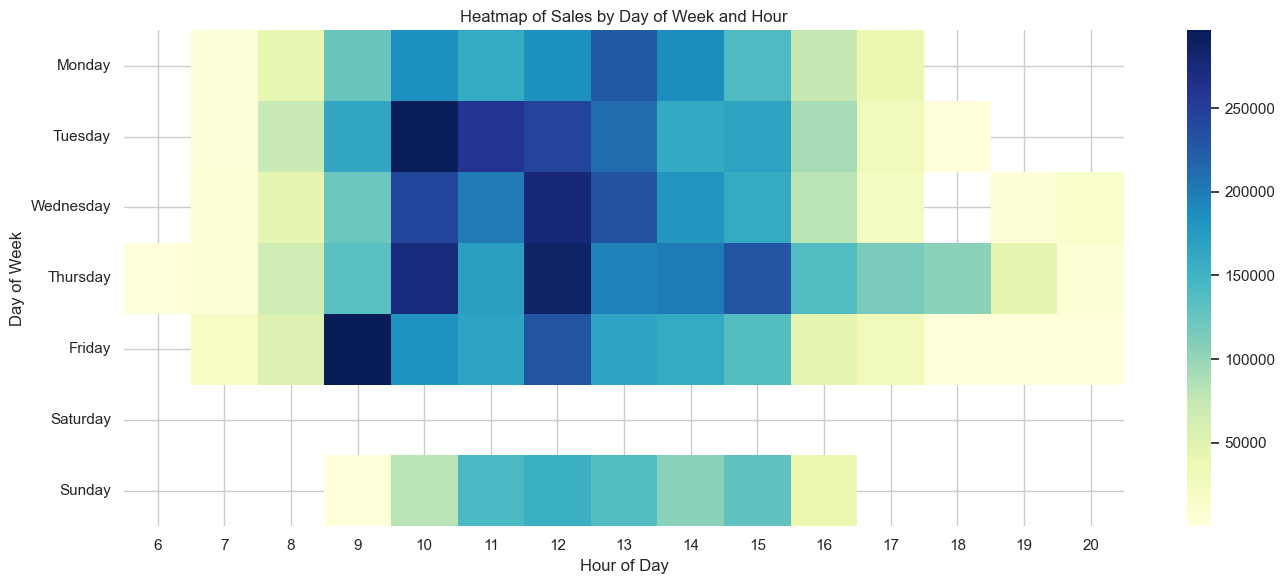

In [22]:
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.day_name()

heatmap_data = df_cleaned.groupby(['DayOfWeek', 'Hour'])['TotalPrice'].sum().unstack()

# Sort days for better readability
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Heatmap of Sales by Day of Week and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()
